![](https://user-images.githubusercontent.com/117534684/257281618-e5bbb1fc-630a-4d2c-844d-1c3c83e0da45.jpg)

# **Introduction:**
In this report, we perform an in-depth analysis of the diabetes dataset, including data preprocessing, feature engineering, model building, and hyperparameter tuning. The dataset contains information about various health attributes of patients, and our objective is to predict whether a patient has diabetes or not based on the provided features.

**1. Data Overview:**
The diabetes dataset comprises features related to pregnancy, glucose levels, blood pressure, skin thickness, insulin, BMI, age, and an outcome variable indicating the presence or absence of diabetes. The dataset contains both numerical and categorical features.

**2. Data Preprocessing:**
We start by handling missing values and zero values in the dataset.

*Missing Values:* We identified missing values in the 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI' columns and filled them using the median values of the corresponding Outcome class (0 or 1).

*Zero Values:* We replaced zero values (potentially representing missing values) in columns other than 'Pregnancies' and 'Outcome' with NaN values.

**3. Data Visualization:**
We performed exploratory data analysis by visualizing the distribution of the target variable 'Outcome' and the relationships between different features. This analysis provided insights into the dataset and helped identify potential patterns and outliers.

**4. Feature Engineering:**
We introduced new categorical features based on specific bins of numerical features such as 'BMI_CAT', 'Age_CAT', 'Glucose_CAT', 'Insulin_CAT', and 'BloodPressure_CAT'. These categorical features can potentially help improve model performance.

**5. Data Encoding and Scaling:**
We applied one-hot encoding to categorical features and used Min-Max scaling on numerical features. These steps ensure that the data is in a suitable format for training machine learning models.

**6. Model Building:**
We experimented with various classification models, including Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), CatBoost, LightGBM, and Gradient Boosting. We evaluated each model's performance using accuracy, precision, recall, and F1 score.

**7. Model Hyperparameter Tuning:**
We performed hyperparameter tuning for models that support it. The models underwent an exhaustive search for optimal hyperparameters using GridSearchCV. The tuning process aimed to improve model performance by finding the best combinations of hyperparameters.

**8. Model Evaluation:**
We summarized the results of the hyperparameter tuning, including the best parameters and scores for each model. The results allowed us to compare the performance of different models and identify the best-performing one.

**9. Feature Importance:**
We visualized the feature importance of the LightGBM model, which provides insights into which features contribute the most to predicting the outcome. This information can be valuable for understanding the model's decision-making process.

**Conclusion:**
The analysis and modeling of the diabetes dataset yielded valuable insights and provided a comparison of multiple classifiers' performance. The hyperparameter tuning further optimized the models, ensuring the best possible accuracy for diabetes prediction. The feature importance plot from the LightGBM model revealed which features play a crucial role in predicting the outcome.

**Importing Libraries and Suppressing Warnings:**
* The code begins by importing necessary libraries, such as pandas, numpy, seaborn, matplotlib, and various classifiers from scikit-learn, catboost, and lightgbm.
* It also imports warnings to suppress any warning messages that might arise during the analysis, particularly ConvergenceWarning.

In [1]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=Warning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler, StandardScaler, MinMaxScaler
from catboost import CatBoostClassifier
import logging
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

Read the dataset: The code reads the diabetes dataset from a CSV file into a pandas DataFrame named 'df_'.

Data Copy: The code creates a copy of the original DataFrame 'df_' and assigns it to the variable 'df'.

Set display option: The code sets the pandas display option to show all columns in the DataFrame without truncation.

In [3]:
pd.set_option("display.max_columns", None)
df_ = pd.read_csv("/kaggle/input/diabet-dataset/diabetes.csv")
df= df_.copy()

**Introduction:**

This report provides a brief overview of the Python class named CFG, which serves as a configuration class for data preprocessing tasks. The class contains various boolean flags that control different data preprocessing techniques. Each flag represents a specific data preprocessing step and can be enabled or disabled as needed.

In [4]:
class CFG:
    outlier_clipper = True
    outlier_remover = False
    outlier_replacer = False
    
    one_hot_encoder = True
    label_encoder = False
    ordinal_encoder = False
    
    min_max_scaler = True
    robust_scaler = False
    standard_scaler = False

**Data Exploration and Preprocessing:**

Check DataFrame information, data types, and head to get an overview of the dataset.
Check for missing values and duplicated rows in the DataFrame.
Calculate summary statistics (count, mean, standard deviation, min, 25th percentile, median, 75th percentile, max) for numerical features in the DataFrame.

In [5]:
def check_df(data, head=5):
    print("\n******Shape******")
    print(f'Shape     : {df.shape}\n')
    print("\n******Info******")
    print(data.info())
    print("\n******Types******")
    print(data.dtypes)
    print("\n******Head******")
    print(data.head(head))
    print("\n******Missing Values******")
    print(data.isnull().sum())
    print("\n******Duplicated Values******")
    print(data.duplicated().sum())
    print("\n******Unique Values******")
    print(data.nunique())
    print("\n******Describe******")
    print(data.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).T)
    
check_df(df)


******Shape******
Shape     : (768, 9)


******Info******
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

******Types******
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin      

In [6]:
def grab_col_names(dataframe, cat_th=10, car_th=20, print_results=True):

    '''
   Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
   Note Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Dataframe to get variable names
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables
    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical view
    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))

    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        The sum of 3 lists with return equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables
    '''

    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < 10 and dataframe[col].dtypes in ["int", "flaot"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > 20 and str(dataframe[col].dtypes) in ["category", "object"]]
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    cat_cols = cat_cols + num_but_cat
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    if print_results:
        print(f'Observations {dataframe.shape[0]}')
        print(f'Variables:  {dataframe.shape[1]}')
        print(f'cat_cols:  {len(cat_cols)}')
        print(f'num_cols:  {len(num_cols)}')
        print(f'cat_but_car:  {len(cat_but_car)}')
        print(f'num_but_cat:  {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations 768
Variables:  9
cat_cols:  1
num_cols:  8
cat_but_car:  0
num_but_cat:  1


**Missing Value:**

The code performs a check on all features present in the dataset to determine if there are any missing values.

In [7]:
def check_missing_value(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    
    if na_name:
        return na_columns
    
check_missing_value(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


**Zeros Value**:

It has been observed that in all features except for 'Pregnancies' and 'Outcome', erroneous entries are present where 0 values are used as placeholders for missing or unknown data.

In [8]:
def print_zeros(dataframe):
    zero_counts = {}
    total_rows = len(dataframe)

    for col in dataframe.columns:
        if col not in ['Pregnancies', 'Outcome']:
            zeros_in_col = dataframe[col].eq(0).sum()
            zero_counts[col] = zeros_in_col

    if zero_counts:
        result_df = pd.DataFrame.from_dict(zero_counts, orient='index', columns=['Zero_Count'])
        result_df['Percentage'] = (result_df['Zero_Count'] / total_rows) * 100

        return result_df
    
    else:
        return pd.DataFrame()
    
print_zeros(df)


,Zero_Count,Percentage
Glucose,5,0.651042
BloodPressure,35,4.557292
SkinThickness,227,29.557292
Insulin,374,48.697917
BMI,11,1.432292
DiabetesPedigreeFunction,0,0.000000
Age,0,0.000000


All data entries that were originally entered as 0 have been replaced with NaN values, and a recheck has been performed to verify this update.

In [9]:
missing_value = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in missing_value:
    df[col] = np.where(df[col] == 0, np.nan, df[col])
    
def missing_value_summary(dataframe):
    total_rows = len(dataframe)
    missing_counts = dataframe.isnull().sum()
    missing_percentage = (missing_counts / total_rows) * 100

    result_df = pd.DataFrame({
        'Missing_Count': missing_counts,
        'Missing_Percentage': missing_percentage
    })

    return result_df

missing_value_summary(df)

,Missing_Count,Missing_Percentage
Pregnancies,0,0.000000
Glucose,5,0.651042
BloodPressure,35,4.557292
SkinThickness,227,29.557292
Insulin,374,48.697917
BMI,11,1.432292
DiabetesPedigreeFunction,0,0.000000
Age,0,0.000000
Outcome,0,0.000000


**Fill the all missing value:**

All columns with missing values have been filled using the median value of their respective groups to ensure consistency among the features. Features have been grouped in a way that they are compatible with each other, and missing values have been replaced with their respective group medians.

In [10]:
def fill_features_with_median(dataframe):
    median_glucose = dataframe.groupby('Outcome')['Glucose'].transform('median')
    dataframe['Glucose'].fillna(median_glucose, inplace=True)

    median_insulin = dataframe.groupby('Outcome')['Insulin'].transform('median')
    dataframe['Insulin'].fillna(median_insulin, inplace=True)
    
    median_skin_thickness = dataframe.groupby('Outcome')['SkinThickness'].transform('median')
    dataframe['SkinThickness'].fillna(median_skin_thickness, inplace=True)
    
    median_blood_pressure = dataframe.groupby(['Age', 'Outcome'])['BloodPressure'].transform('median')
    dataframe['BloodPressure'].fillna(median_blood_pressure, inplace=True)
    
    median_bmi = dataframe.groupby(['SkinThickness', 'Outcome'])['BMI'].transform('median')
    dataframe['BMI'].fillna(median_bmi, inplace=True)
    
    if df.isnull().any().any():
        df.dropna(inplace=True)

fill_features_with_median(df)

In [11]:
missing_value_summary(df)

,Missing_Count,Missing_Percentage
Pregnancies,0,0.0
Glucose,0,0.0
BloodPressure,0,0.0
SkinThickness,0,0.0
Insulin,0,0.0
BMI,0,0.0
DiabetesPedigreeFunction,0,0.0
Age,0,0.0
Outcome,0,0.0


**Outlier Detection:**

Outlier detection has been performed on all features in the dataset using the quartiles Q1=0.05 and Q3=0.95 as thresholds. This process helps identify any extreme or unusual data points that may be present in the dataset.

In [12]:
def outlier_thresholds(dataframe, col, low_quantile=0.07, up_quantile=0.93):
    
    quantile_one = dataframe[col].quantile(low_quantile)
    quantile_three = dataframe[col].quantile(up_quantile)
    
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    
    return  low_limit, up_limit

In [13]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [14]:
for col in num_cols:
    print(f"{col}, outlier detection is {check_outlier(df, col)}")

Pregnancies, outlier detection is False
Glucose, outlier detection is False
BloodPressure, outlier detection is False
SkinThickness, outlier detection is True
Insulin, outlier detection is True
BMI, outlier detection is False
DiabetesPedigreeFunction, outlier detection is True
Age, outlier detection is False


**Outlier Detection with Boxplot Visualization:**

The purpose of specifying quartiles Q1=0.05 and Q3=0.95 is to visualize and compare the distribution of data points in each feature using box plots. Box plots provide a graphical representation of the data distribution, showing the median, quartiles, and potential outliers.

By using Q1=0.05 and Q3=0.95 as thresholds, the box plots highlight any potential outliers that fall beyond these quantiles. This visual comparison helps in identifying extreme data points that may be considered as outliers in the dataset.

Box plots have been created for each feature, and the data points outside the whiskers are displayed as individual points, indicating potential outliers in the dataset. This allows for a comprehensive understanding of the data distribution and the presence of outliers in each feature.

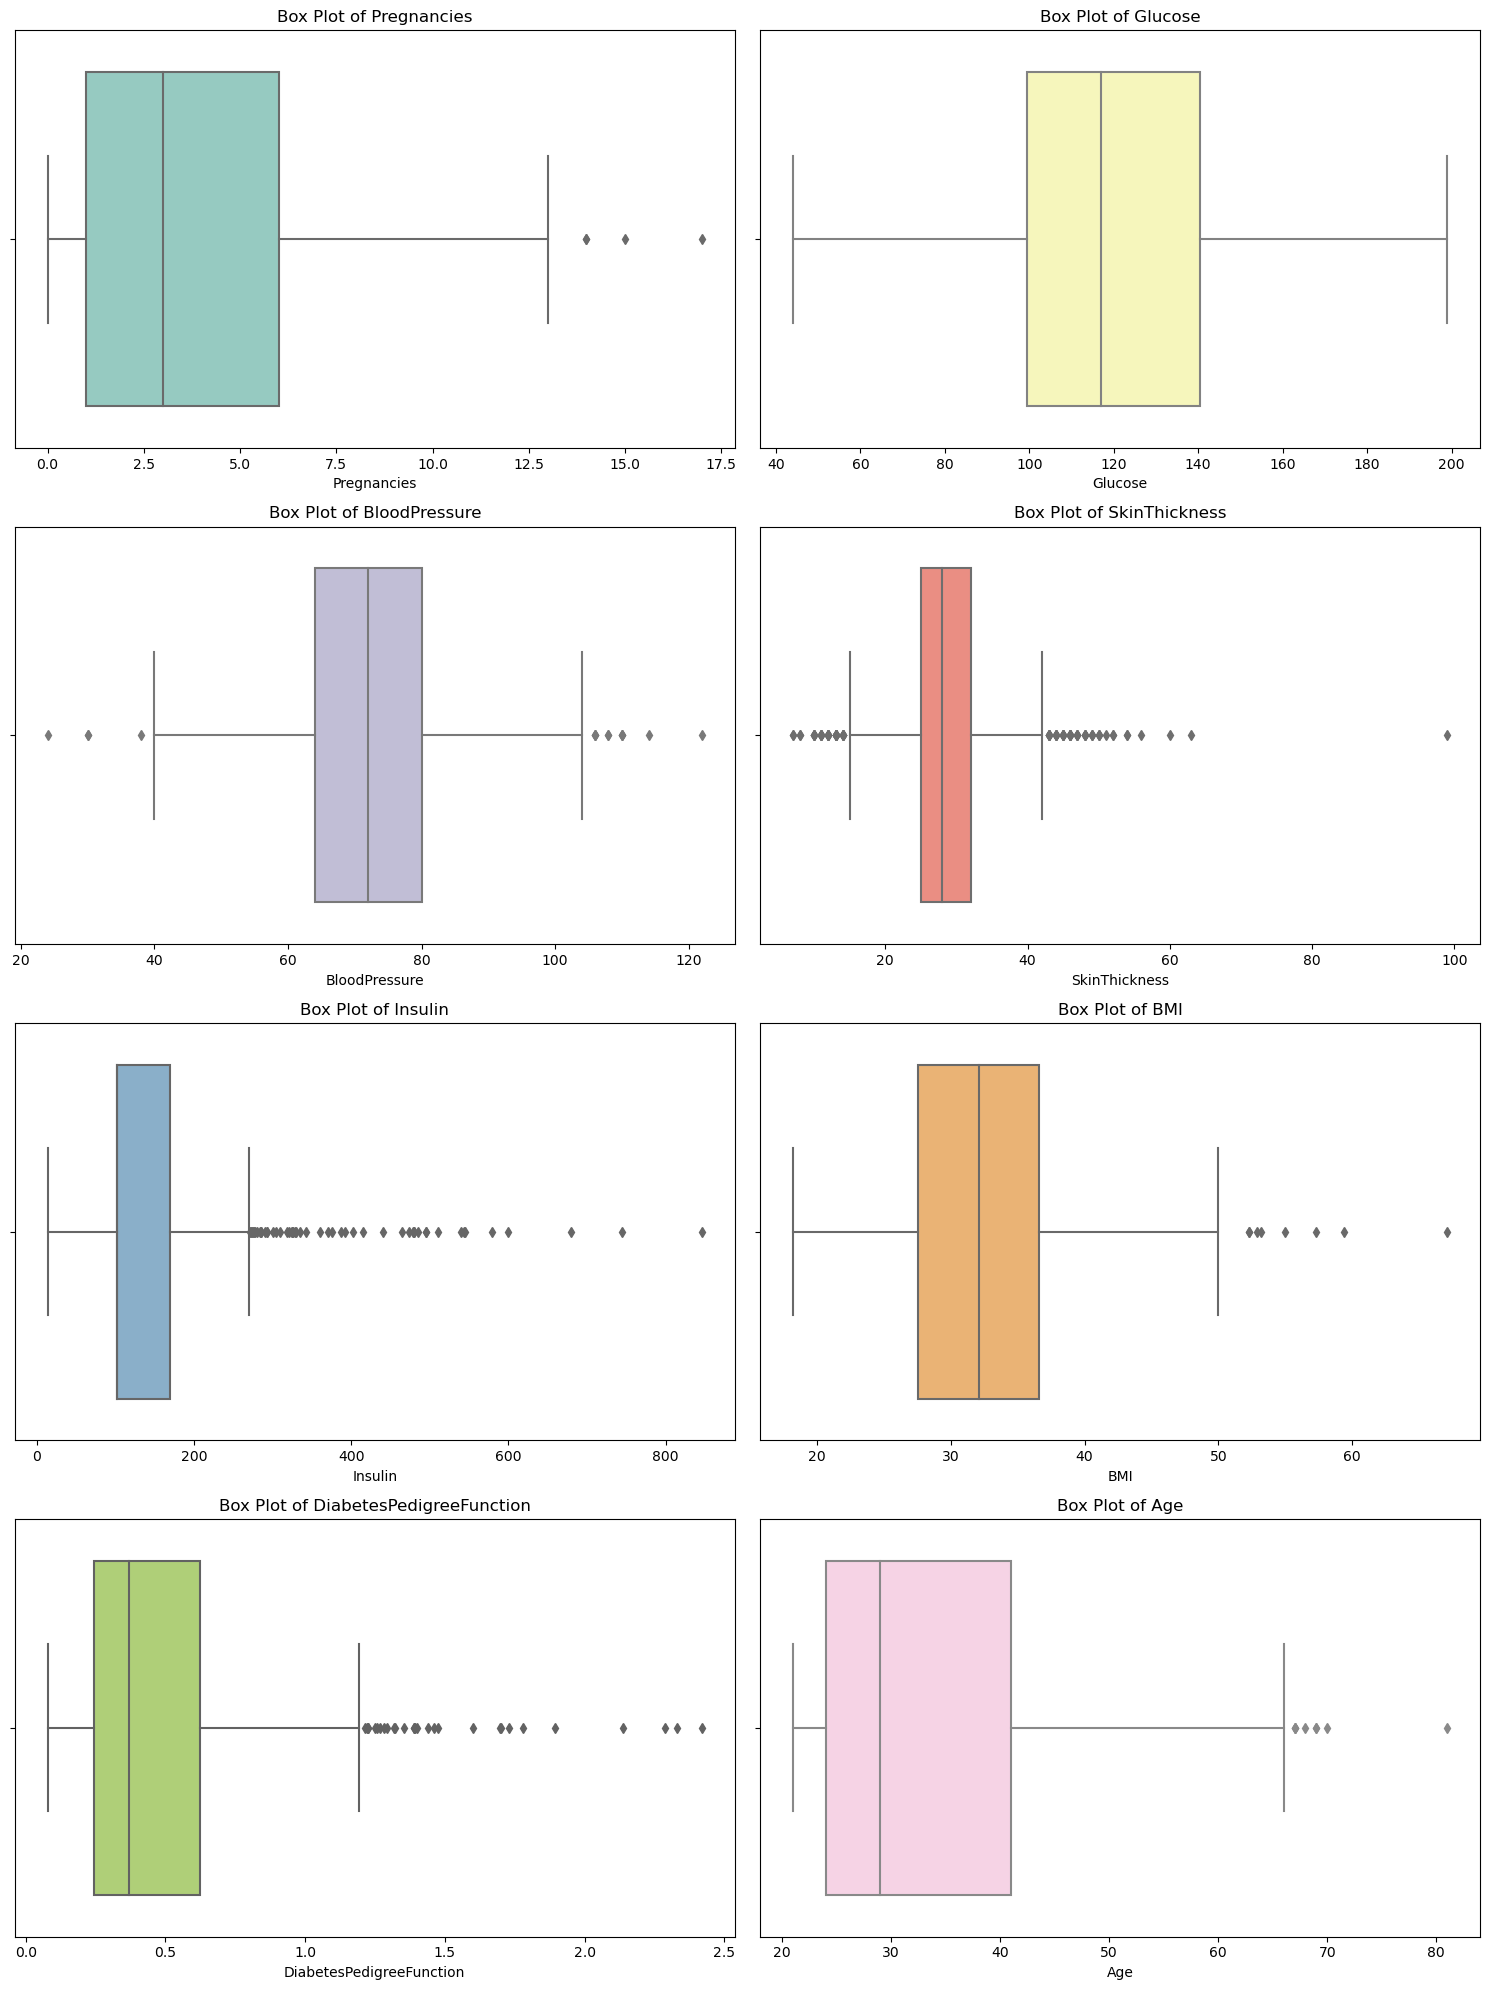

In [15]:
def plot_boxplots(dataframe, num_cols, ncols=2):
    nrows = (len(num_cols) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))
    
    colors = sns.color_palette('Set3', n_colors=len(dataframe.columns))
    
    for i, col in enumerate(num_cols):
        if col in dataframe.columns:
            ax = axes[i // ncols, i % ncols]
            sns.boxplot(x=dataframe[col], ax=ax, color=colors[i])
            ax.set_title(f"Box Plot of {col}")

    plt.tight_layout()
    plt.show()

plot_boxplots(df, num_cols)

**Dataset Feature Visualization:**

Histogram plots have been created to visualize the distributions of the features in the dataset. Histograms provide a graphical representation of the frequency distribution of numerical data.

By plotting histograms for each feature, the shape and spread of the data can be observed, allowing for insights into the underlying data distribution. This visualization helps in understanding the central tendencies, ranges, and potential clusters or patterns in the data.

Histograms are useful for identifying data skewness, the presence of multiple peaks, or any unusual patterns that might not be immediately apparent from summary statistics alone. They provide a comprehensive view of the data distribution and aid in making data-driven decisions during data analysis and modeling.

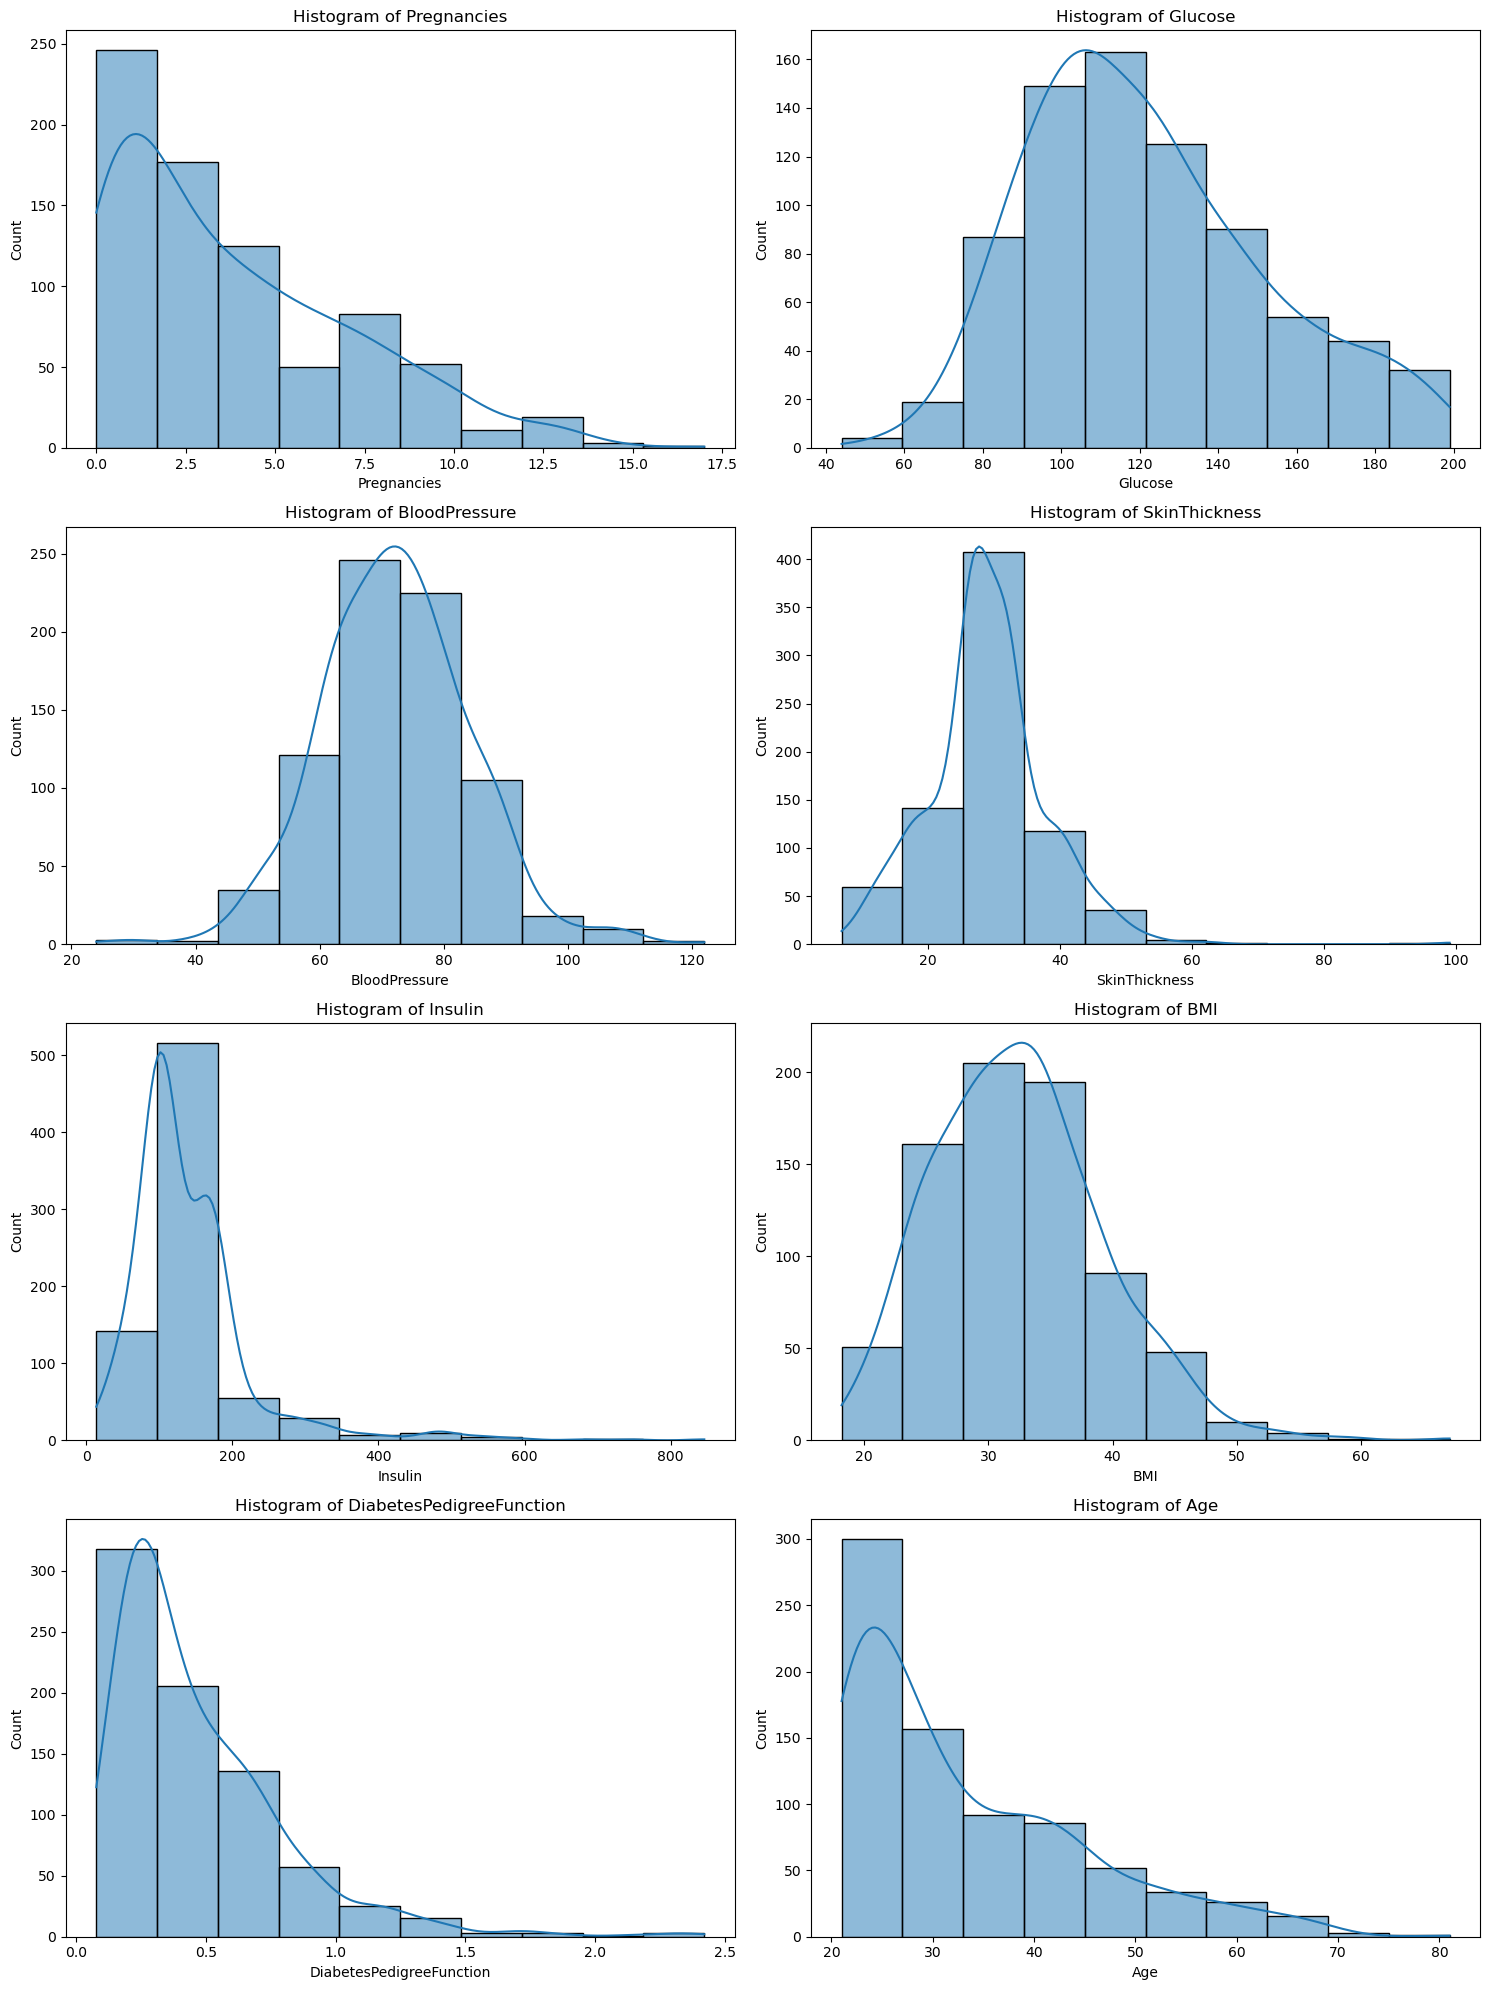

In [16]:
def hist_plot(dataframe, num_cols, ncols=2, bins=10):
    nrows = (len(num_cols) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))
    
    for i, col in enumerate(num_cols):
        if col in dataframe.columns:
            ax = axes[i // ncols, i % ncols]
            sns.histplot(dataframe[col], ax=ax, bins=bins, kde=True)
            ax.set_title(f"Histogram of {col}")

    plt.tight_layout()
    plt.show()
    
hist_plot(df, num_cols)

**Target Variable Visualization:**

The target variable "Outcome" was visualized using two methods:
A pie chart displayed the proportion of each category (presence or absence of diabetes) relative to the whole. It provided a quick overview of the class distribution.
A bar plot illustrated the counts of each category, making it easier to compare the number of data points in each class.

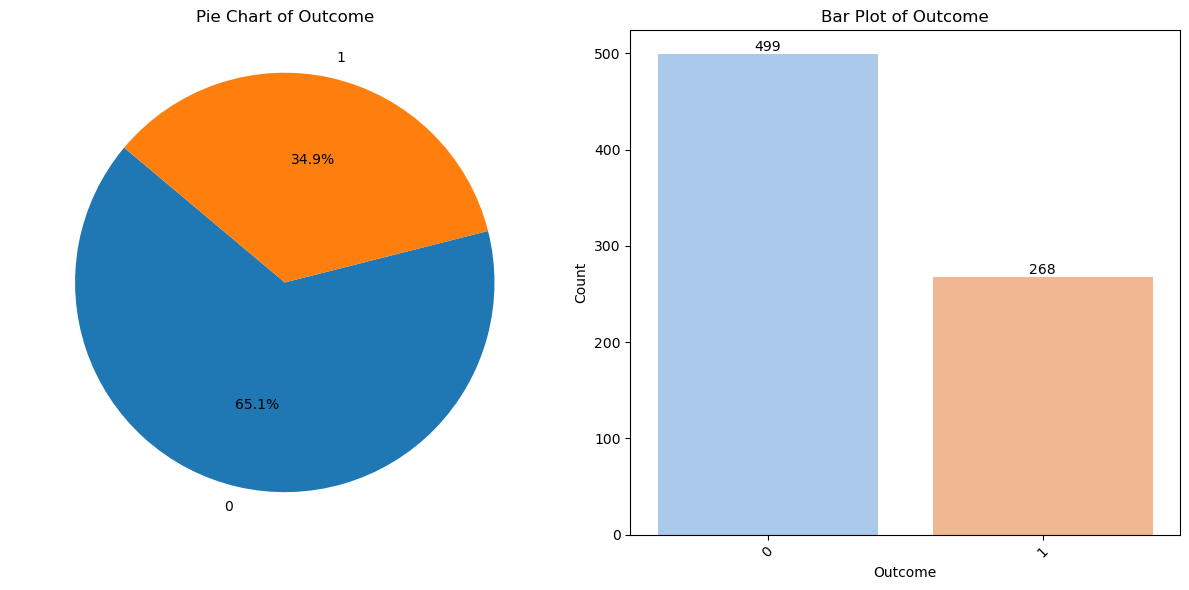

In [17]:
def plot_outcome(dataframe, column):
    counts = dataframe[column].value_counts()
    labels = counts.index
    values = counts.values
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    axes[0].axis('equal')
    axes[0].set_title(f"Pie Chart of {column}")

    sns.barplot(x=labels, y=values, palette='pastel', ax=axes[1])
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Count')
    axes[1].set_title(f"Bar Plot of {column}")
    axes[1].tick_params(axis='x', rotation=45)
    
    for index, value in enumerate(values):
        axes[1].text(index, value, str(value), ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()
    
plot_outcome(df,'Outcome')

**Correlation Heatmap:**

A correlation heatmap was generated to visualize the pairwise correlations between numerical features. This helped identify potential multicollinearity and relationships between variables.

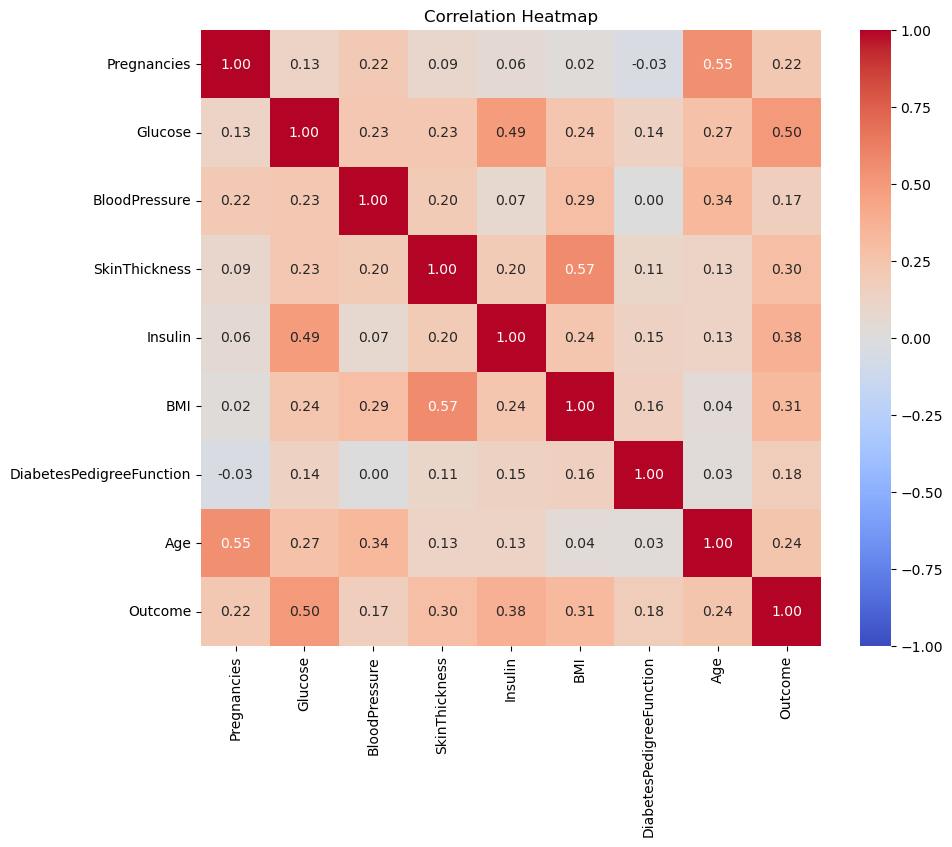

In [18]:
def plot_correlation_heatmap(dataframe):
    correlation_matrix = dataframe.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title("Correlation Heatmap")
    plt.show()

plot_correlation_heatmap(df)

# **Feature Engineering** 

We introduced new categorical features based on specific bins of numerical features such as 'BMI_CAT', 'Age_CAT', 'Glucose_CAT', 'Insulin_CAT', and 'BloodPressure_CAT'. These categorical features can potentially help improve model performance.

In [19]:
def extract_features(dataframe):
    dataframe['BMI_CAT'] = pd.cut(x=dataframe['BMI'], 
                                  bins=[0, 18.5, 24.9, 29.9, np.inf],
                                  labels=["Underweight", "Healthy", "Overweight", "Obese"])
    
    dataframe['Age_CAT'] = pd.cut(x=dataframe['Age'], 
                              bins=[0, 18, 30, 50, np.inf],
                              labels=["Young", "Adult", "Middle-aged", "Senior"])
    
    dataframe['Glucose_CAT'] = pd.cut(x=dataframe['Glucose'], 
                                 bins=[0, 100, 140, 199, np.inf],
                                 labels=["Low", "Normal", "Pre-Diabetes", "Diabetes"])

    dataframe['Insulin_CAT'] = pd.cut(x=dataframe['Insulin'], 
                                     bins=[0, 100, 140, 199, np.inf],
                                     labels=["Low", "Normal", "Pre-High", "High"])
    
    dataframe['BloodPressure_CAT'] = pd.cut(x=dataframe['BloodPressure'], 
                                       bins=[0, 80, 90, 120, np.inf],
                                       labels=["Low", "Normal", "Pre-High", "High"])
    
    return dataframe.head()
    
extract_features(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_CAT,Age_CAT,Glucose_CAT,Insulin_CAT,BloodPressure_CAT
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obese,Middle-aged,Pre-Diabetes,Pre-High,Low
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Middle-aged,Low,Normal,Low
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Healthy,Middle-aged,Pre-Diabetes,Pre-High,Low
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Adult,Low,Low,Low
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obese,Middle-aged,Normal,Pre-High,Low


# **New Features Visualization**

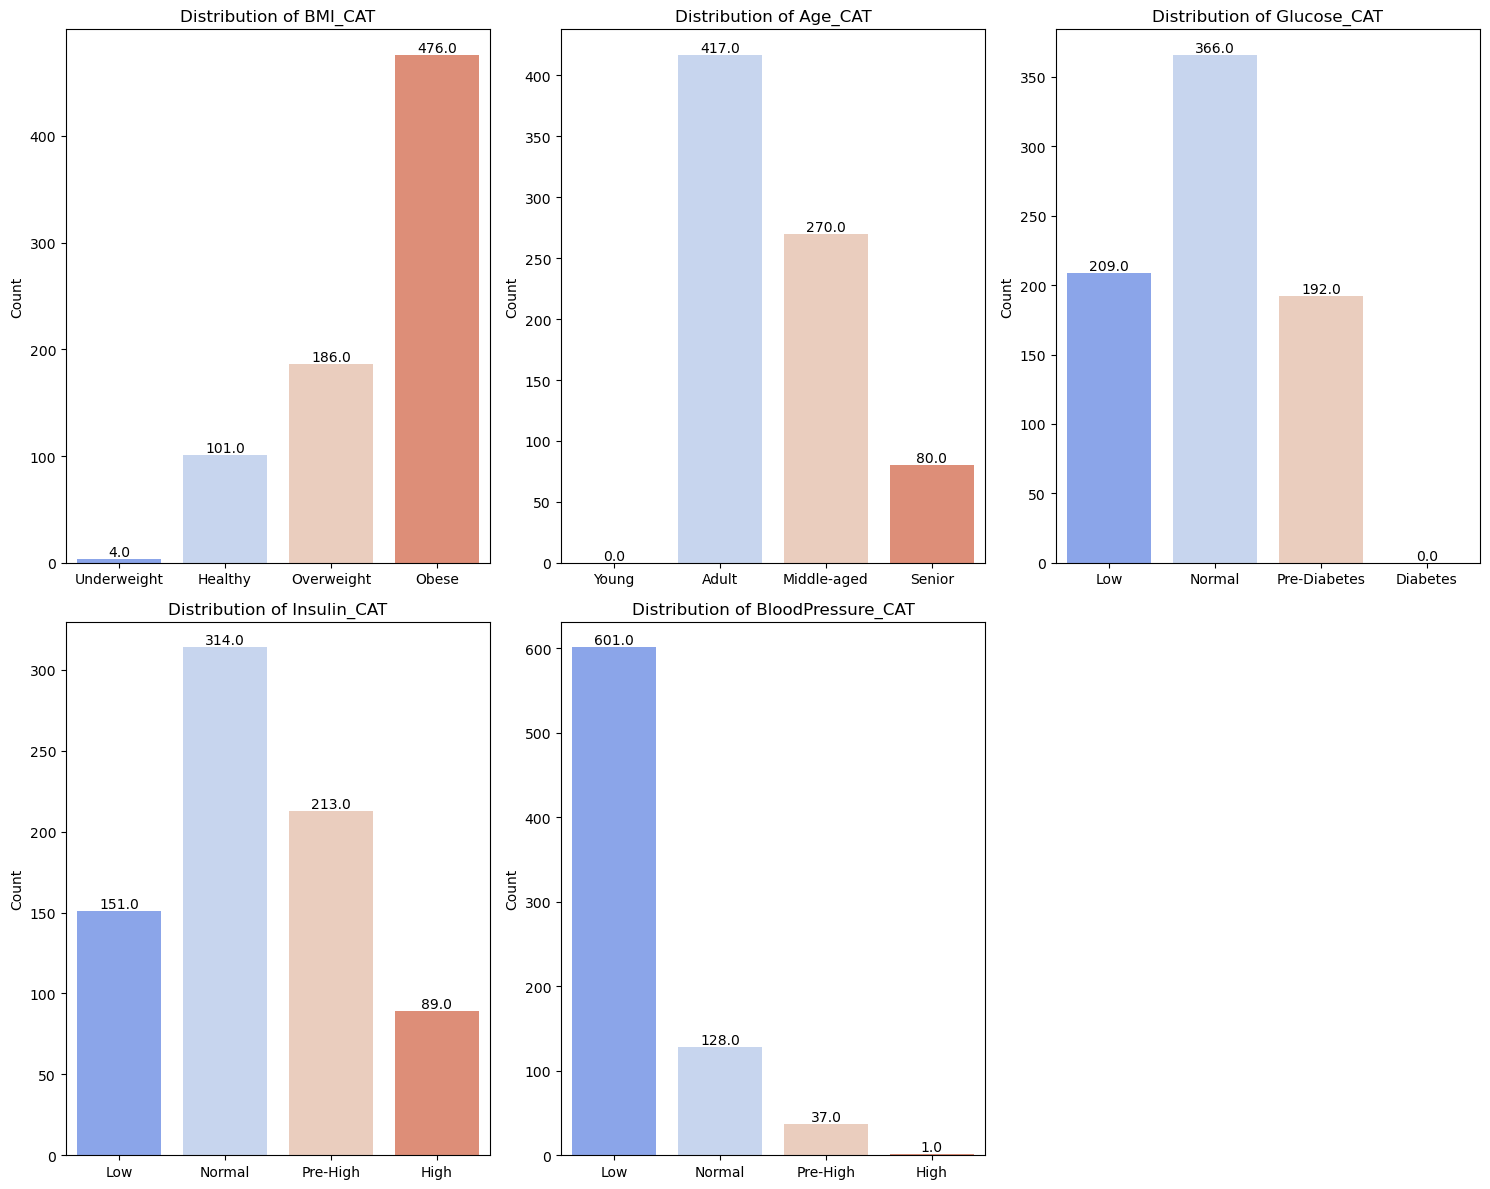

In [20]:
def visualize_features(dataframe):
    feature_columns = ['BMI_CAT', 'Age_CAT', 'Glucose_CAT', 'Insulin_CAT', 'BloodPressure_CAT']
    num_plots = len(feature_columns)
    num_cols = 3
    num_rows = (num_plots - 1) // num_cols + 1
    
    plt.figure(figsize=(15, 12))
    
    for i, feature in enumerate(feature_columns, 1):
        plt.subplot(num_rows, num_cols, i)
        ax = sns.countplot(x=feature, data=dataframe, palette='coolwarm')
        plt.xlabel('')
        plt.ylabel('Count')
        plt.title(f'Distribution of {feature}')
        
        for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='bottom', fontsize=10, color='black')
    
    plt.tight_layout()
    plt.show()

visualize_features(df)

# **Outlier Processing Control**

The functions within the DataProcessor class have been used to quickly check the boolean values inside the CFG class.

In [21]:
class DataProcessor:
    def __init__(self, cfg):
        self.cfg = cfg

    def process_data(self, dataframe):
        if self.cfg.outlier_clipper:
            for col in dataframe.columns:
                if dataframe[col].dtypes not in ['object', 'category']:
                    q1_val = dataframe[col].quantile(0.07)
                    q3_val = dataframe[col].quantile(0.93)
                    dataframe.loc[:, col] = dataframe[col].clip(lower=q1_val, upper=q3_val)

        if self.cfg.outlier_remover:
            for col in dataframe.columns:
                if dataframe[col].dtypes not in ['object', 'category']:
                    q1_val = dataframe[col].quantile(0.07)
                    q3_val = dataframe[col].quantile(0.93)
                    dataframe = dataframe.loc[(dataframe[col] >= q1_val) & (processed_data[col] <= q3_val)]
                    
        if self.cfg.outlier_replacer:
            for col in dataframe.columns:
                if dataframe[col].dtypes not in ['object', 'category']:
                    median_val = dataframe[col].median()
                    dataframe[col] = dataframe[col].where((dataframe[col] >= q1_val) & (dataframe[col] <= q3_val), median_val)


        return dataframe.head()


data_processor = DataProcessor(CFG())
data_processor.process_data(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_CAT,Age_CAT,Glucose_CAT,Insulin_CAT,BloodPressure_CAT
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obese,Middle-aged,Pre-Diabetes,Pre-High,Low
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Middle-aged,Low,Normal,Low
2,8,176.0,64.0,32.0,169.5,23.3,0.672,32,1,Healthy,Middle-aged,Pre-Diabetes,Pre-High,Low
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Adult,Low,Low,Low
4,0,137.0,56.0,35.0,168.0,43.1,0.968,33,1,Obese,Middle-aged,Normal,Pre-High,Low


# **Outlier Detection Control**

In [22]:
def check_outliers(dataframe):
    outliers_exist = False
    for col in dataframe.columns:
        if dataframe[col].dtypes not in ['object', 'category']:
            q1_val = dataframe[col].quantile(0.07)
            q3_val = dataframe[col].quantile(0.93)
            iqr = q3_val - q1_val
            lower_bound = q1_val - 1.5 * iqr
            upper_bound = q3_val + 1.5 * iqr
            outliers = dataframe[(dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)]
            if not outliers.empty:
                print(f"Outliers detected! Column: {col}")
                outliers_exist = True
    if not outliers_exist:
        print("No outliers detected.")
        
check_outliers(df)

No outliers detected.


# **After Outlier Clipping All Features Visualization**

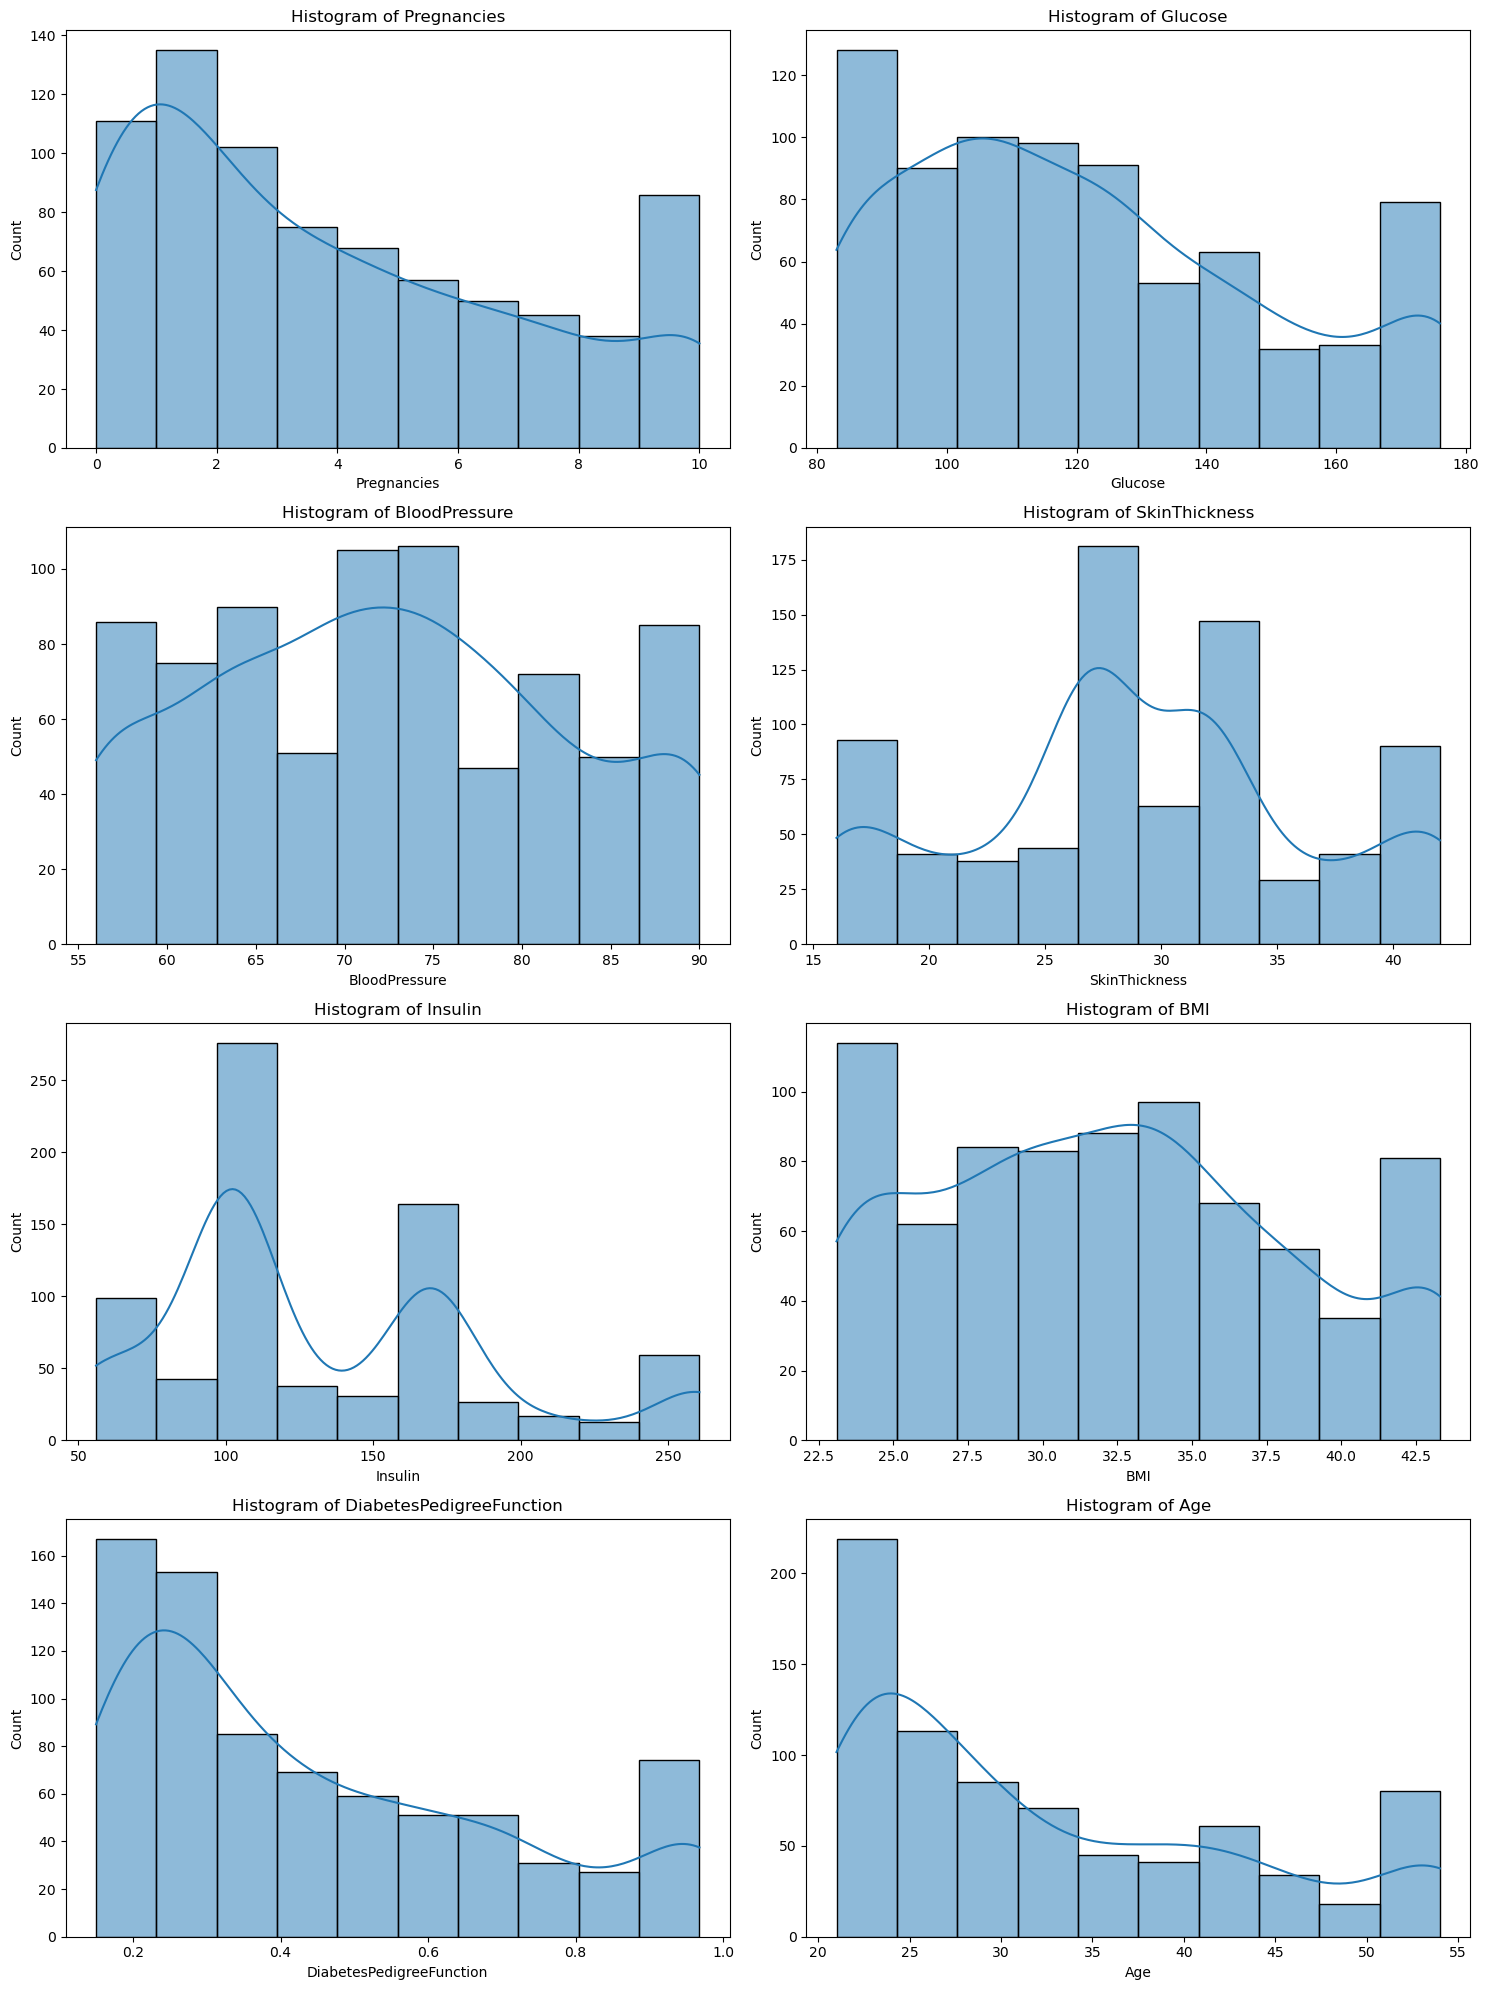

In [23]:
hist_plot(df, num_cols)

# **After Outlier Clipping Correlation Analysis**

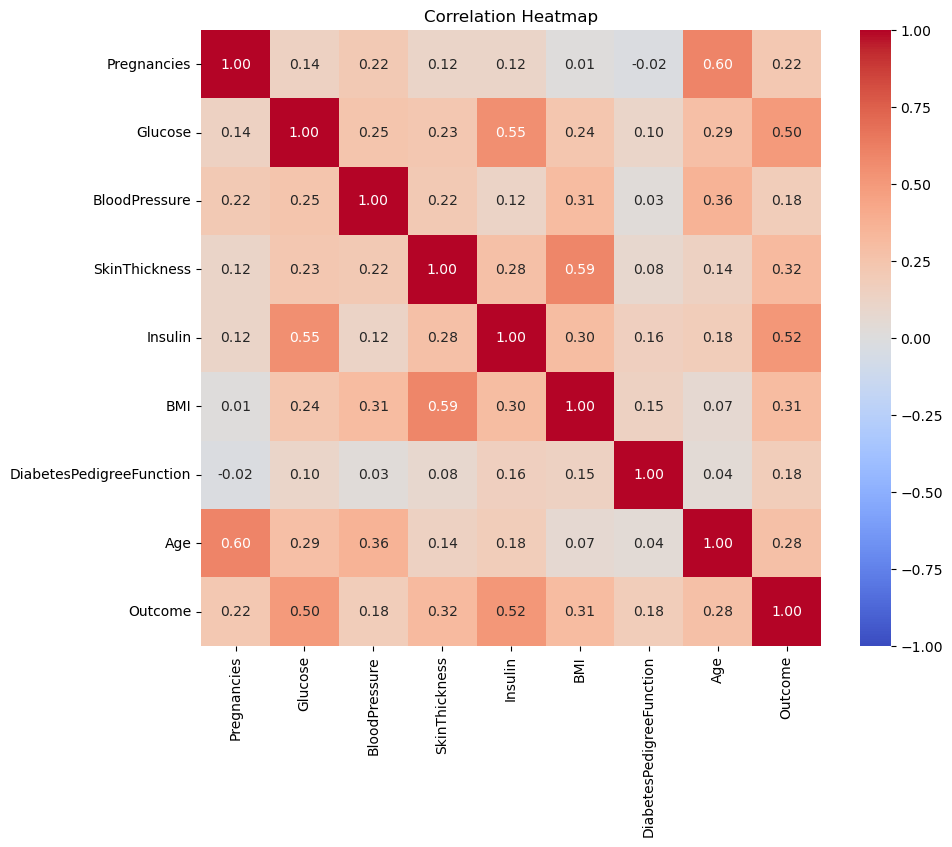

In [24]:
plot_correlation_heatmap(df)

# **Encoding Processing Control**

The encoder functions within the DataProcessorEncode class have been prepared to be used by checking their corresponding boolean values in the CFG class. This approach allows for easy and flexible control over which encoding methods should be applied to the data during the data processing steps. By enabling or disabling specific encoders through the CFG class, users can choose the desired encoding techniques according to their data preprocessing needs.

In [25]:
class DataProcessorEncode:
    def __init__(self, cfg):
        self.cfg = cfg

    def encode_data(self, dataframe):
        if self.cfg.one_hot_encoder:
            object_cols = dataframe.select_dtypes(include=['object', 'category']).columns
            if len(object_cols) > 0:
                dataframe = pd.get_dummies(dataframe, columns=object_cols)
                print("One-hot encoding applied.")
            else:
                print("Warning: No object or category columns found. One-hot encoding was not applied.")

        if self.cfg.label_encoder:
            label_encoder = LabelEncoder()
            object_cols = dataframe.select_dtypes(include=['object', 'category']).columns
            if len(object_cols) > 0:
                for col in object_cols:
                    dataframe[col] = label_encoder.fit_transform(dataframe[col])
                    print("Label encoding applied.")
            else:
                print("Warning: No object or category columns found. Label encoding was not applied.")
                
        if self.cfg.ordinal_encoder:
            ordinal_encoder = {}  # Boş bir sözlük oluşturuyoruz.
            object_cols = dataframe.select_dtypes(include=['object', 'category']).columns
            if len(object_cols) > 0:
                for col in object_cols:
                    unique_values = sorted(dataframe[col].unique())
                    ordinal_encoder[col] = {value: index for index, value in enumerate(unique_values)}
                    dataframe[col] = dataframe[col].map(ordinal_encoder[col])
                    print("Ordinal encoding applied.")
            else:
                print("Warning: No object or category columns found. Ordinal encoding was not applied.")


        return dataframe

data_processor_encode = DataProcessorEncode(CFG())
df = data_processor_encode.encode_data(df)
df.head()

One-hot encoding applied.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_CAT_Underweight,BMI_CAT_Healthy,BMI_CAT_Overweight,BMI_CAT_Obese,Age_CAT_Young,Age_CAT_Adult,Age_CAT_Middle-aged,Age_CAT_Senior,Glucose_CAT_Low,Glucose_CAT_Normal,Glucose_CAT_Pre-Diabetes,Glucose_CAT_Diabetes,Insulin_CAT_Low,Insulin_CAT_Normal,Insulin_CAT_Pre-High,Insulin_CAT_High,BloodPressure_CAT_Low,BloodPressure_CAT_Normal,BloodPressure_CAT_Pre-High,BloodPressure_CAT_High
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,8,176.0,64.0,32.0,169.5,23.3,0.672,32,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,0,137.0,56.0,35.0,168.0,43.1,0.968,33,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0


# **Scaling Processing Control**

The scaler functions within the DataProcessorScaled class have been prepared to be used by checking their corresponding boolean values in the CFG class. This design allows for easy and customizable scaling of the data based on the user's preferences. By enabling or disabling specific scalers through the CFG class, users can apply the desired scaling methods to the numerical features of the dataset during the data processing steps. This approach ensures flexibility in data preprocessing and helps achieve better model performance.

In [26]:
class DataProcessorScaled:
    def __init__(self, cfg):
        self.cfg = cfg

    def scaled_data(self, dataframe):
        if self.cfg.min_max_scaler:
            num_cols = dataframe.select_dtypes(include=['int', 'float']).columns
            if len(num_cols) > 0:
                min_max_scaler = MinMaxScaler()
                dataframe[num_cols] = min_max_scaler.fit_transform(dataframe[num_cols])
                print("Min-Max scaling applied.")
            else:
                print("Warning: No numerical columns found. Min-Max scaling was not applied.")

        if self.cfg.standard_scaler:
            num_cols = dataframe.select_dtypes(include=['int', 'float']).columns
            if len(num_cols) > 0:
                standard_scaler = StandardScaler()
                dataframe[num_cols] = standard_scaler.fit_transform(dataframe[num_cols])
                print("Standard scaling applied.")
            else:
                print("Warning: No numerical columns found. Standard scaling was not applied.")

        if self.cfg.robust_scaler:
            num_cols = dataframe.select_dtypes(include=['int', 'float']).columns
            if len(num_cols) > 0:
                robust_scaler = RobustScaler()
                dataframe[num_cols] = robust_scaler.fit_transform(dataframe[num_cols])
                print("Robust scaling applied.")
            else:
                print("Warning: No numerical columns found. Robust scaling was not applied.")

        return dataframe
    
data_processor_scale = DataProcessorScaled(CFG())
df = data_processor_scale.scaled_data(df)
df.head()

Min-Max scaling applied.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_CAT_Underweight,BMI_CAT_Healthy,BMI_CAT_Overweight,BMI_CAT_Obese,Age_CAT_Young,Age_CAT_Adult,Age_CAT_Middle-aged,Age_CAT_Senior,Glucose_CAT_Low,Glucose_CAT_Normal,Glucose_CAT_Pre-Diabetes,Glucose_CAT_Diabetes,Insulin_CAT_Low,Insulin_CAT_Normal,Insulin_CAT_Pre-High,Insulin_CAT_High,BloodPressure_CAT_Low,BloodPressure_CAT_Normal,BloodPressure_CAT_Pre-High,BloodPressure_CAT_High
0,0.6,0.698925,0.470588,0.730769,0.554578,0.519802,0.583323,0.878788,1.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
1,0.1,0.021505,0.294118,0.500000,0.227206,0.173267,0.246072,0.303030,0.0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0.8,1.000000,0.235294,0.615385,0.554578,0.009901,0.638310,0.333333,1.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
3,0.1,0.064516,0.294118,0.269231,0.185674,0.247525,0.021237,0.000000,0.0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,0.0,0.580645,0.000000,0.730769,0.547249,0.990099,1.000000,0.363636,1.0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0


# **Model Building**

We experimented with various classification models, including Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), CatBoost, LightGBM, and Gradient Boosting. We evaluated each model's performance using accuracy, precision, recall, and F1 score.

In [27]:
test_size = 0.2
random_state = 42
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)


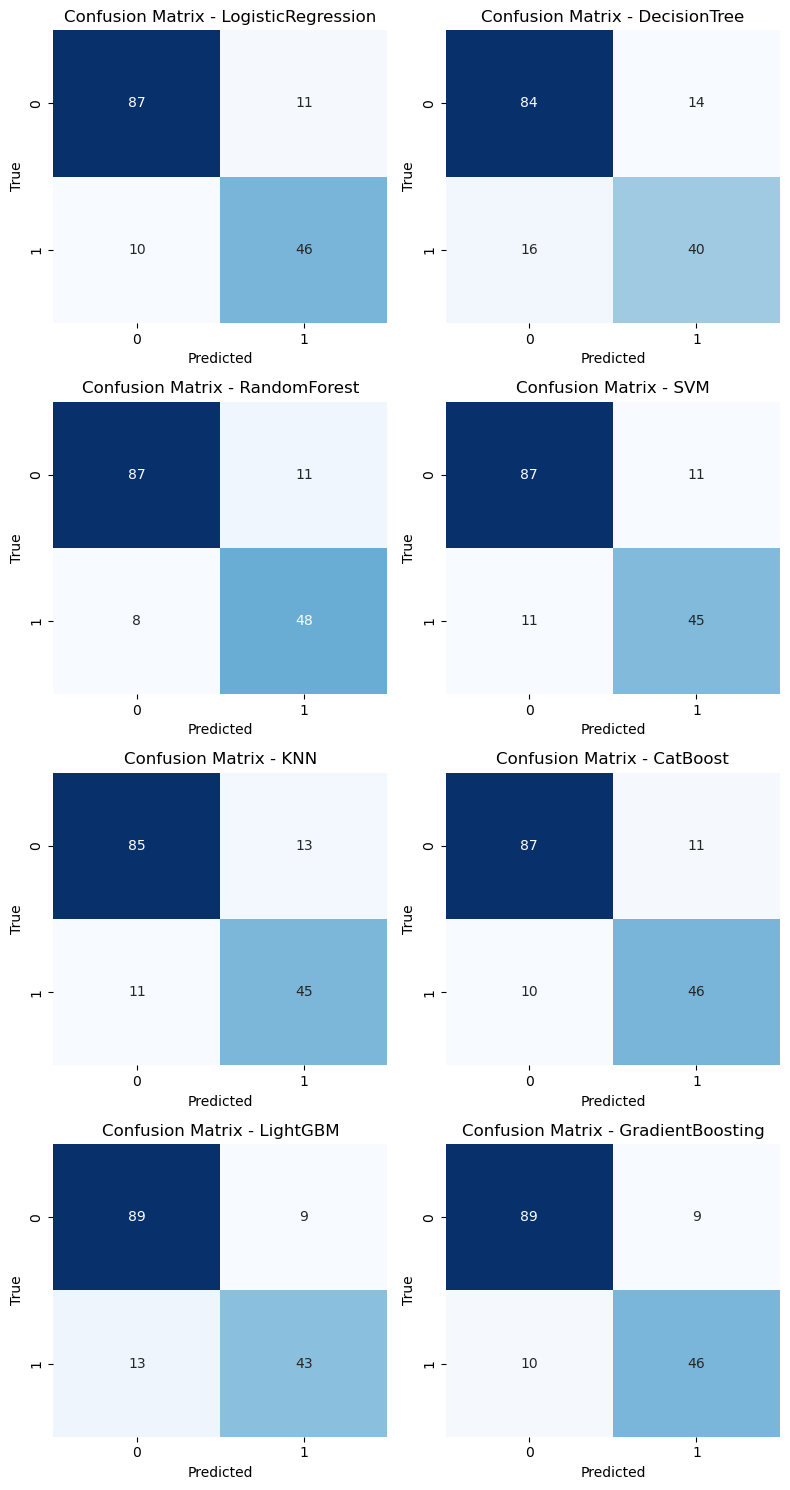

,Accuracy,Precision,Recall,F1 Score
RandomForest,0.876623,0.878615,0.876623,0.877274
GradientBoosting,0.876623,0.876217,0.876623,0.876381
LogisticRegression,0.863636,0.864220,0.863636,0.863890
CatBoost,0.863636,0.864220,0.863636,0.863890
SVM,0.857143,0.857143,0.857143,0.857143
LightGBM,0.857143,0.855958,0.857143,0.855926
KNN,0.844156,0.845579,0.844156,0.844720
DecisionTree,0.805195,0.803906,0.805195,0.804408


In [28]:
def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'Confusion Matrix - {model_name}')

def model(df, test_size=0.2, random_state=42):
    
    models = {
        'LogisticRegression': LogisticRegression(max_iter=3000, solver='lbfgs'),
        'DecisionTree': DecisionTreeClassifier(),
        'RandomForest': RandomForestClassifier(),
        'SVM': SVC(),
        'KNN': KNeighborsClassifier(),
        'CatBoost': CatBoostClassifier(verbose=False),
        'LightGBM': lgb.LGBMClassifier(),
        'GradientBoosting': GradientBoostingClassifier()
    }

    results = {}
    
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8, 15))
    axes = axes.flatten()
    results = {}

    for i, (model_name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results[model_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        }

        plot_confusion_matrix(y_test, y_pred, model_name, axes[i])

    plt.tight_layout()
    plt.show()
    
    return results

def model_to_dataframe(df, test_size=0.2, random_state=42):
    results = model(df, test_size, random_state)
    result_df = pd.DataFrame(results).T
    result_df = result_df.sort_values(by='Accuracy', ascending=False)
    return result_df

model_to_dataframe(df)

# **Model Hyperparameter Tuning**

We performed hyperparameter tuning for models that support it. The models underwent an exhaustive search for optimal hyperparameters using GridSearchCV. The tuning process aimed to improve model performance by finding the best combinations of hyperparameters.

In [29]:
def disable_catboost_logging():
    logging.getLogger('catboost').propagate = False

def enable_catboost_logging():
    logging.getLogger('catboost').propagate = True

def hyperparameter_tuning(models, params, X, y, cv=5):
    best_models = {}
    
    for model_name, model in models.items():
        if model_name not in params:
            print(f"Skipping Hyperparameter Tuning for {model_name} as it doesn't require hyperparameters.")
            continue
        
        print(f"Performing Hyperparameter Tuning for {model_name}...")
        if isinstance(model, CatBoostClassifier):
            model.set_params(verbose=False)
        
        grid_search_cv = GridSearchCV(model, params[model_name], cv=cv, n_jobs=-1)
        grid_search_cv.fit(X, y)
        
        if isinstance(model, CatBoostClassifier):
            enable_catboost_logging()
        
        best_params = grid_search_cv.best_params_
        best_score = grid_search_cv.best_score_
        best_model = grid_search_cv.best_estimator_
        
        best_models[model_name] = {
            'Best Parameters': best_params,
            'Best Score': best_score,
            'Best Model': best_model
        }
        
        print(f"{model_name} - Best Parameters:", best_params)
        print(f"{model_name} - Best Score:", best_score)
        print(f"{model_name} - Best Model:", best_model)
        print("\n")
    
    return best_models

In [30]:
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'CatBoost': CatBoostClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    'GradientBoosting': GradientBoostingClassifier()
}

params = {
    'LogisticRegression': {'C': np.arange(1,11), 'penalty': ['l1', 'l2'], 'max_iter': np.arange(100, 1501, 100)},
    'DecisionTree': {'max_depth': np.arange(5,51,5), 'min_samples_split': np.arange(4,33,4)},
    'RandomForest': {'n_estimators': np.arange(100,301,100), 'max_depth': np.arange(4,33,4)},
    'SVM': {'C': np.arange(1,11), 'kernel': ['linear', 'rbf']},
    'KNN': {'n_neighbors': np.arange(5,51,5), 'weights': ['uniform', 'distance']},
    'CatBoost': {'iterations': np.arange(100,301,100), 'depth': np.arange(4,33, 4)},
    'LightGBM': {'num_leaves': np.arange(100,301,100), 'max_depth': np.arange(4,33,4)},
    'GradientBoosting': {'n_estimators': np.arange(100,301,100), 'learning_rate': np.arange(0,1.01,0.05)}
}

best_models = hyperparameter_tuning(models, params, X_train, y_train)

def results_to_dataframe(best_models):
    results = []

    for model_name, model_info in best_models.items():
        params = model_info['Best Parameters']
        score = model_info['Best Score']
        best_model = model_info['Best Model']

        results.append({
            'Model': model_name,
            'Best Parameters': params,
            'Best Score': score
        })

    return pd.DataFrame(results)

result_df = results_to_dataframe(best_models)
result_df.sort_values(by='Best Score', ascending=False)

Performing Hyperparameter Tuning for LogisticRegression...


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimi

LogisticRegression - Best Parameters: {'C': 6, 'max_iter': 100, 'penalty': 'l2'}
LogisticRegression - Best Score: 0.8761028921764626
LogisticRegression - Best Model: LogisticRegression(C=6)


Performing Hyperparameter Tuning for DecisionTree...
DecisionTree - Best Parameters: {'max_depth': 5, 'min_samples_split': 20}
DecisionTree - Best Score: 0.867839530854325
DecisionTree - Best Model: DecisionTreeClassifier(max_depth=5, min_samples_split=20)


Performing Hyperparameter Tuning for RandomForest...
RandomForest - Best Parameters: {'max_depth': 24, 'n_estimators': 100}
RandomForest - Best Score: 0.8891243502598961
RandomForest - Best Model: RandomForestClassifier(max_depth=24)


Performing Hyperparameter Tuning for SVM...
SVM - Best Parameters: {'C': 7, 'kernel': 'linear'}
SVM - Best Score: 0.8744768759163002
SVM - Best Model: SVC(C=7, kernel='linear')


Performing Hyperparameter Tuning for KNN...
KNN - Best Parameters: {'n_neighbors': 20, 'weights': 'distance'}
KNN - Best Score: 0.8598

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


CatBoost - Best Parameters: {'depth': 4, 'iterations': 200}
CatBoost - Best Score: 0.8907370385179261
CatBoost - Best Model: <catboost.core.CatBoostClassifier object at 0x79ab3aac9b40>


Performing Hyperparameter Tuning for LightGBM...


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


LightGBM - Best Parameters: {'max_depth': 4, 'num_leaves': 100}
LightGBM - Best Score: 0.9004664800746369
LightGBM - Best Model: LGBMClassifier(max_depth=4, num_leaves=100)


Performing Hyperparameter Tuning for GradientBoosting...
GradientBoosting - Best Parameters: {'learning_rate': 1.0, 'n_estimators': 300}
GradientBoosting - Best Score: 0.887458349993336
GradientBoosting - Best Model: GradientBoostingClassifier(learning_rate=1.0, n_estimators=300)




,Model,Best Parameters,Best Score
6,LightGBM,"{'max_depth': 4, 'num_leaves': 100}",0.900466
5,CatBoost,"{'depth': 4, 'iterations': 200}",0.890737
2,RandomForest,"{'max_depth': 24, 'n_estimators': 100}",0.889124
7,GradientBoosting,"{'learning_rate': 1.0, 'n_estimators': 300}",0.887458
0,LogisticRegression,"{'C': 6, 'max_iter': 100, 'penalty': 'l2'}",0.876103
3,SVM,"{'C': 7, 'kernel': 'linear'}",0.874477
1,DecisionTree,"{'max_depth': 5, 'min_samples_split': 20}",0.867840
4,KNN,"{'n_neighbors': 20, 'weights': 'distance'}",0.859816


# **Feature Importance**

We visualized the feature importance of the LightGBM model, which provides insights into which features contribute the most to predicting the outcome. This information can be valuable for understanding the model's decision-making process.

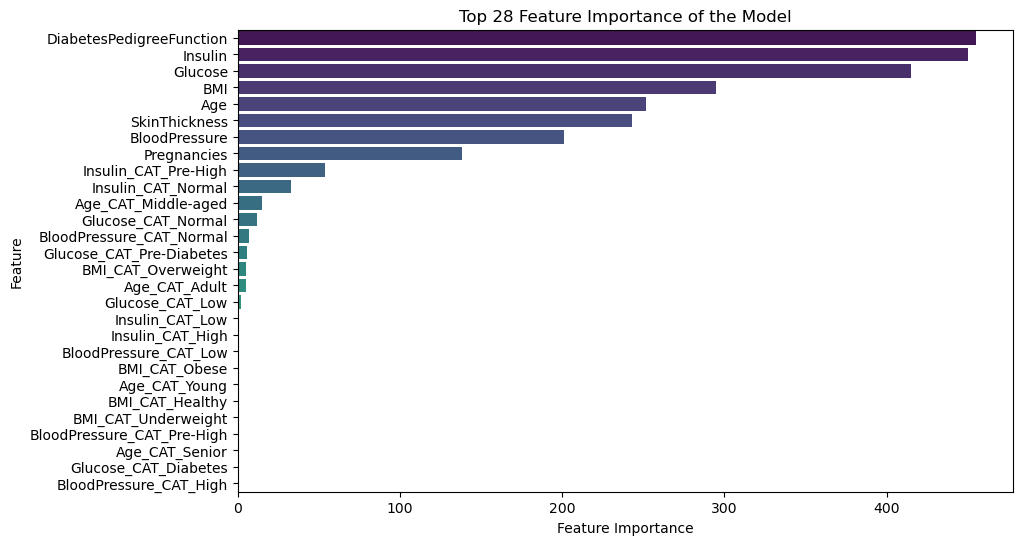

In [31]:
def plot_feature_importance(model, feature_names, top_n=None):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        raise ValueError("Feature importance not available for this model.")
    
    if top_n is not None:
        indices = np.argsort(importances)[::-1]
        top_indices = indices[:top_n]
        top_importances = importances[top_indices]
        top_feature_names = [feature_names[idx] for idx in top_indices]
    else:
        top_importances = importances
        top_feature_names = feature_names

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_importances, y=top_feature_names, palette='viridis')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Top {} Feature Importance of the Model'.format(len(top_feature_names)))
    plt.show()

model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

plot_feature_importance(model, X.columns, top_n=len(X.columns))